In [1]:
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import pandas as pd # A common package for viewing tabular data
import sklearn.linear_model, sklearn.datasets # We want to be able to access the sklearn datasets again, also we are using some model evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder # We will be using the inbuilt preprocessing functions sklearn provides
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.linear_model import Ridge, Lasso, LinearRegression # Ridge & Lasso regression are types of linear model that use regularisation
from sklearn.metrics import mean_squared_error, r2_score # Allows us to use the MSE function without calling in sklearn each time
import warnings

import seaborn as sns

warnings.filterwarnings('ignore') # suppresses a convergence warning we may get when testing Lasso - this is just cosmetic to stop too much output.

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor




pattern find

In [2]:
data = pd.read_csv("/Users/zuhannoor/Documents/1Studies/ML/ML coursework/COMP1801_Coursework_Dataset.csv")
#print(data.head())

random forest regressor

In [60]:


# 1. Separate the target variable 'Lifespan' from the feature set
X = data.drop(columns=['Lifespan'])
y = data['Lifespan']

# 2. Define categorical and numerical features for preprocessing
categorical_features = ['partType', 'microstructure'] #'castType', 'seedLocation'
numerical_features = ['HeatTreatTime', 'quenchTime', 'Nickel%', 'Iron%', 'smallDefects', 'largeDefects','coolingRate']

# 3. Set up preprocessor with PolynomialFeatures for interaction terms, standardization, and one-hot encoding for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=3, include_bias=False)),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# 4. Define the RandomForestRegressor and a pipeline including preprocessor and regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

# 5. Define an expanded hyperparameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 15, 25, 35],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]
}

# 6. Split data into train and test sets with fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 7. Implement GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Retrieve all results for hyperparameter tuning
cv_results = pd.DataFrame(grid_search.cv_results_)

# Collect MSE and R² for each hyperparameter combination
mse_r2_results = []
for i in range(len(cv_results)):
    params = cv_results.loc[i, 'params']
    # Retrieve MSE (mean negative MSE values from grid search are negated)
    mse = -cv_results.loc[i, 'mean_test_score']
    # Use the fitted model to compute R² on the test set (rerunning each model to avoid data leakage)
    model = grid_search.estimator.set_params(**params).fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))
    mse_r2_results.append({'params': params, 'MSE': mse, 'R²': r2})

# Convert results to DataFrame for better readability
mse_r2_results_df = pd.DataFrame(mse_r2_results)

# Display all tuning results with MSE and R²
print("Hyperparameter tuning results (MSE and R²):")
print(mse_r2_results_df)

# Show best model parameters
print("\nBest Hyperparameters found:", grid_search.best_params_)

# Final best model's MSE and R² on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print("\nBest Model's Performance on Test Set:")
print("Mean Squared Error (MSE):", final_mse)
print("R² Score:", final_r2)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=None, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.4s
[CV] END regressor__max_depth=None, regressor__max_

all test size 0.1
-

with poly degree=1, categorical_features = ['partType', 'microstructure']
numerical_features = ['HeatTreatTime', 'quenchTime', 'Nickel%', 'Iron%', 'smallDefects', 'largeDefects','coolingRate']

Best Model's Performance on Test Set:
Mean Squared Error (MSE): 7313.390617032985
R² Score: 0.9346478455677838
-

with poly degree=2

Best Model's Performance on Test Set:
Mean Squared Error (MSE): 8641.963551139776
R² Score: 0.9227757730762649
-
poly degree=3

Best Model's Performance on Test Set:
Mean Squared Error (MSE): 9642.897323316094
R² Score: 0.9138314705111401





below gbr

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor


# 1. Separate the target variable 'Lifespan' from the feature set
X = data.drop(columns=['Lifespan'])
y = data['Lifespan']

# 2. Define categorical and numerical features for preprocessing
categorical_features = ['partType', 'microstructure'] #'castType', 'seedLocation'
numerical_features = ['HeatTreatTime', 'quenchTime', 'Nickel%', 'Iron%', 'smallDefects', 'largeDefects','coolingRate']

# 3. Set up preprocessor with PolynomialFeatures for interaction terms, standardization, and one-hot encoding for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=3, include_bias=False)),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# 4. Define the GradentBoostingRegressor and a pipeline including preprocessor and regressor
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', GradientBoostingRegressor(random_state=42))])


# 5. Define a hyperparameter grid specific for GradientBoostingRegressor in GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}


# 6. Split data into train and test sets with fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 7. Implement GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Retrieve all results for hyperparameter tuning
cv_results = pd.DataFrame(grid_search.cv_results_)

# Collect MSE and R² for each hyperparameter combination
mse_r2_results = []
for i in range(len(cv_results)):
    params = cv_results.loc[i, 'params']
    # Retrieve MSE (mean negative MSE values from grid search are negated)
    mse = -cv_results.loc[i, 'mean_test_score']
    # Use the fitted model to compute R² on the test set (rerunning each model to avoid data leakage)
    model = grid_search.estimator.set_params(**params).fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))
    mse_r2_results.append({'params': params, 'MSE': mse, 'R²': r2})

# Convert results to DataFrame for better readability
mse_r2_results_df = pd.DataFrame(mse_r2_results)

# Display all tuning results with MSE and R²
print("Hyperparameter tuning results (MSE and R²):")
print(mse_r2_results_df)

# Show best model parameters
print("\nBest Hyperparameters found:", grid_search.best_params_)

# Final best model's MSE and R² on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print("\nBest Model's Performance on Test Set:")
print("Mean Squared Error (MSE):", final_mse)
print("R² Score:", final_r2)



poly feat deg=1
Best Model's Performance on Test Set:
Mean Squared Error (MSE): 4865.644247012536
R² Score: 0.956520805342681
-
poly feat deg=2
Best Model's Performance on Test Set:
Mean Squared Error (MSE): 5609.4084413726
R² Score: 0.9498745594307278
-
poly feat deg=3
Best Model's Performance on Test Set:
Mean Squared Error (MSE): 5724.322945425558
R² Score: 0.9488476882011397

part 4 - Classification- SVM

4.1 binary class create

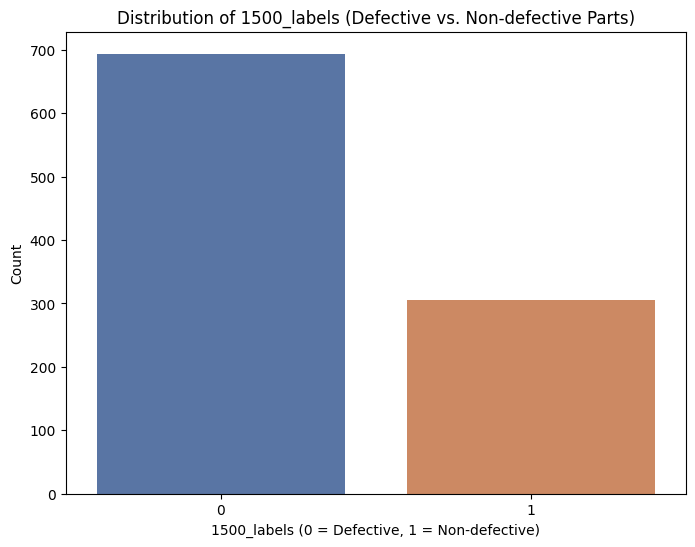

,1500_labels,Count,Proportion
0,0,694,0.694
1,1,306,0.306


In [3]:
# Step 1: Create a new binary column "1500_labels" where 1 indicates a lifespan >= 1500, and 0 otherwise
data['1500_labels'] = (data['Lifespan'] >= 1500).astype(int)

# Step 2: Plot the distribution of the new label to assess balance
plt.figure(figsize=(8, 6))
sns.countplot(x='1500_labels', data=data, palette='deep')
plt.title("Distribution of 1500_labels (Defective vs. Non-defective Parts)")
plt.xlabel("1500_labels (0 = Defective, 1 = Non-defective)")
plt.ylabel("Count")
plt.show()

# Step 3: Show a table with the counts and proportions of each label value to further illustrate balance
label_counts = data['1500_labels'].value_counts().reset_index()
label_counts.columns = ['1500_labels', 'Count']
label_counts['Proportion'] = label_counts['Count'] / label_counts['Count'].sum()

# Display the table
label_counts


preprocessing features

In [ ]:
# Exclude 'Lifespan' feature as per instructions
X = data.drop(columns=['Lifespan', '1500_labels'])  # Input features
y = data['1500_labels']  # Target variable



# Automatically identify categorical features based on data type
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
# Identify strictly numerical features based on their data type
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()


# Define preprocessor with one-hot encoding for categorical data and standard scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Split the data into training and test sets with a 80-20 ratio, using stratification to preserve label distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Fit the preprocessor to the training data and transform both training and test sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Display a summary of the processed data shapes and class distributions to confirm preprocessing
{
    "X_train_shape": X_train_processed.shape,
    "X_test_shape": X_test_processed.shape,
    "y_train_distribution": y_train.value_counts().to_dict(),
    "y_test_distribution": y_test.value_counts().to_dict()
}


{'X_train_shape': (800, 19),
 'X_test_shape': (200, 19),
 'y_train_distribution': {0: 555, 1: 245},
 'y_test_distribution': {0: 139, 1: 61}}

SVM

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score


# Step 1: Create binary output labels for classification based on the 1500-hour threshold
data['1500_labels'] = (data['Lifespan'] >= 1500).astype(int)

# Step 2: Exclude 'Lifespan' feature as per instructions
X = data.drop(columns=['Lifespan', '1500_labels'])  # Input features
y = data['1500_labels']  # Target variable

# Step 3: Identify categorical and strictly numerical features
# Automatically identify categorical features based on data type
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Identify numerical features based on data type
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 4: Define preprocessor with one-hot encoding for categorical data and standard scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Step 5: Split the data into training and test sets with an 80-20 split, stratifying for label distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Step 6: Preprocess the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the parameter grid for C, gamma, and kernel (RBF only as specified)
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],           # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1, 10],     # Kernel coefficient, relevant for RBF
    'kernel': ['rbf']                       # Only using RBF kernel
}

# Initialize the SVM model
svm_rbf = SVC(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation using F1 as the scoring metric
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train_processed, y_train)

# Retrieve best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)

# Calculate weighted Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compile the results
results = {
    "Best Parameters": best_params,
    "Cross-validated F1 Score": round(float(best_score), 2),
    "Test Precision (Weighted)": round(float(precision), 2),
    "Test Recall (Weighted)": round(float(recall), 2),
    "Test F1 Score (Weighted)": round(float(f1), 2)
}

# Display the results summary
print(results)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

<!-- {'Best Parameters': {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, 'Cross-validated F1 Score': 0.76, 'Test Precision': 0.75, 'Test Recall': 0.72, 'Test F1 Score': 0.73}
{'Best Parameters': {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}, 'Cross-validated F1 Score': 0.6, 'Test Precision': 0.58, 'Test Recall': 0.62, 'Test F1 Score': 0.6}
{'Best Parameters': {'C': 100, 'gamma': 10, 'kernel': 'sigmoid'}, 'Cross-validated F1 Score': 0.25, 'Test Precision': 0.25, 'Test Recall': 0.21, 'Test F1 Score': 0.23} -->

-----------
{'Best Parameters': {'C': 100, 'gamma': 1, 'kernel': 'sigmoid'}, 'Cross-validated F1 Score': 0.23, 'Test Precision (Weighted)': 0.51, 'Test Recall (Weighted)': 0.54, 'Test F1 Score (Weighted)': 0.52}

{'Best Parameters': {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}, 'Cross-validated F1 Score': 0.65, 'Test Precision (Weighted)': 0.72, 'Test Recall (Weighted)': 0.7, 'Test F1 Score (Weighted)': 0.71}

{'Best Parameters': {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}, 'Cross-validated F1 Score': 0.79, 'Test Precision (Weighted)': 0.81, 'Test Recall (Weighted)': 0.81, 'Test F1 Score (Weighted)': 0.81}



table (i think manual would be better)

In [20]:
# Extract and format the results from GridSearchCV
tuning_results = pd.DataFrame(grid_search.cv_results_)
tuning_results = tuning_results[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'std_test_score']]
tuning_results.columns = ['C', 'Gamma', 'Kernel', 'Mean F1 Score', 'Std F1 Score']

# Sort by Mean F1 Score to identify the best and worst performing parameter sets
tuning_results = tuning_results.sort_values(by='Mean F1 Score', ascending=False).reset_index(drop=True)

# Select the best, middle, and worst performing rows
best_result = tuning_results.iloc[0]                    # Best result (highest F1 score)
middle_result = tuning_results.iloc[len(tuning_results) // 2]  # Middle result
worst_result = tuning_results.iloc[-1]                  # Worst result (lowest F1 score)

# Combine these into a single DataFrame for a concise table and label them
summary_table = pd.DataFrame([best_result, middle_result, worst_result]).reset_index(drop=True)
summary_table['Performance'] = ['Best', 'Middle', 'Worst']  # Add a label column for clarity

# Reorder columns to place the 'Performance' label first
summary_table = summary_table[['Performance', 'C', 'Gamma', 'Kernel', 'Mean F1 Score', 'Std F1 Score']]

# Display the summary table
summary_table


,Performance,C,Gamma,Kernel,Mean F1 Score,Std F1 Score
0,Best,100.0,1.000,sigmoid,0.227778,0.043640
1,Middle,0.1,10.000,sigmoid,0.162743,0.051381
2,Worst,0.1,0.001,sigmoid,0.000000,0.000000


gradient boost

In [ ]:
from xgboost import XGBClassifier

# Step 1: Create binary output labels for classification based on the 1500-hour threshold
data['1500_labels'] = (data['Lifespan'] >= 1500).astype(int)

# Step 2: Exclude 'Lifespan' feature as per instructions
X = data.drop(columns=['Lifespan', '1500_labels'])  # Input features
y = data['1500_labels']  # Target variable

# Step 3: Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 4: Define preprocessor with one-hot encoding for categorical data and standard scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Step 5: Split the data into training and test sets with a 10% test size, stratifying for label distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Step 6: Preprocess the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define the parameter grid for XGBoost tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost model
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42) #use_label_encoder=False, 

# Set up GridSearchCV with 5-fold cross-validation using F1 as the scoring metric
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train_processed, y_train)

# Retrieve best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)

# Calculate weighted precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compile the results
results = {
    "Best Parameters": best_params,
    "Cross-validated F1 Score": round(float(best_score), 2),
    "Test Precision (Weighted)": round(float(precision), 2),
    "Test Recall (Weighted)": round(float(recall), 2),
    "Test F1 Score (Weighted)": round(float(f1), 2)
}

# Display the results summary
print(results)

# Convert the GridSearchCV results to a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns for displaying hyperparameters and mean test F1 score
# Sort by mean_test_score to identify best, worst, and an intermediate row
cv_results_sorted = cv_results[['param_n_estimators', 'param_max_depth', 'param_learning_rate', 'param_subsample', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

# Identify rows for best, worst, and an intermediate score for clear comparison
best_row = cv_results_sorted.iloc[0]  # Best result (highest mean_test_score)
worst_row = cv_results_sorted.iloc[-1]  # Worst result (lowest mean_test_score)
middle_row = cv_results_sorted.iloc[len(cv_results_sorted) // 2]  # Intermediate result

# Compile the three selected rows into a new DataFrame for the final table
tuning_progression_table = pd.DataFrame([best_row, middle_row, worst_row])

# Rename columns for clarity
tuning_progression_table.columns = ['n_estimators', 'max_depth', 'learning_rate', 'subsample', 'Mean Test F1 Score']
tuning_progression_table.reset_index(drop=True, inplace=True)

# Display the table
print(tuning_progression_table)

ModuleNotFoundError: No module named 'xgboost'